In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

Using TensorFlow backend.


# Stock Prize prediction Using LSTM layer in RNN to approximate the trend over a short period of time

<img src="Stocks.jpg" width=5000 height=120 />

In [2]:
data_path_train = "./dataset/Google_Stock_Price_Train.csv"
data_path_test = "./dataset/Google_Stock_Price_Test.csv"

In [3]:
df_train = pd.read_csv(data_path_train)
df_test = pd.read_csv(data_path_test)

In [4]:
df_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


**In this File we will try to predict whether the Google Stock Price Open that day will go up or down Using Recurrent Neural Network(with LSTM layers)**

<img src="LSTM3-chain.png" width=5000 height=120 />

**Long Short Term Memory(LSTM)** are a mini neural network which facilitates by Remembering Some part of the previous Data.\
The Key to LSTMs is the cell pipeline which is the horizontal line running thorough the top of the diagram.

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

In [5]:
training_set = df_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

We normalize the data set using the formula

$ X = \frac{X_1 - X_{Min}}{X_{Max - X_{Min}}} $\
\
To put the values Between 0 and 1

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Create a data structure with 60 timsteps and 1 output

X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(1198, 60)

**Recurrent Neural Network requires a 3-D tensor as input**

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building RNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

## Model

In [11]:
regressor = Sequential()


# Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units=1))

In [12]:
regressor.compile(optimizer="adam", loss='mean_squared_error', metrics=['accuracy'])

<img src="Chart.png" width=500/>

## Putting the Tensorboard callback
Use `tensorboard --logdir logs/scalars` command to open the tensorboard dashboard on localhost:6006

In [13]:
import tensorflow as tf
from datetime import datetime

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, write_graph = True, histogram_freq=5)

callback = [tensorboard_callback]

## Training

In [14]:
history = regressor.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=callback
)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 13s 11ms/sample - loss: 0.0417 - accuracy: 0.0017
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0065 - accuracy: 0.0017
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0050 - accuracy: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0051 - accuracy: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0054 - accuracy: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0050 - accuracy: 0.0017
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0054 - accuracy: 0.0017
Epoch 8/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0048 - accuracy: 0.0017
Epoch 9/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0045 - accuracy: 0.0017
Epoch 10/100
1198/1198 [=======

1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0017 - accuracy: 0.0017
Epoch 79/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0019 - accuracy: 0.0017
Epoch 80/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0018 - accuracy: 0.0017
Epoch 81/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0017 - accuracy: 0.0017
Epoch 82/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0016 - accuracy: 0.0017
Epoch 83/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0016 - accuracy: 0.0017
Epoch 84/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0016 - accuracy: 0.0017
Epoch 85/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0016 - accuracy: 0.0017
Epoch 86/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0016 - accuracy: 0.0017
Epoch 87/100
1198/1198 [==============================] - 5

<font size="3">Although the accuracy is very poor but our goal is not to perfectly fit the predicted into the actual stocks. We only need an approximation of when it will go down and when it will go up</font>

# Seeing the predicted data

**As we have to preprocess the training data so that we can fit it into predictor**

In [15]:
real_stock_price = df_test.iloc[:, 1:2].values

# Getting the predicted price
df_total = pd.concat((df_train['Open'],df_test['Open']), axis=0)

In [16]:
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [17]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [18]:
# Create a data structure with 60 timsteps and 1 output

X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

In [19]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

<font size="4">**To plot the Graph we have to transform the predicted value to the scale of their original data**</font>

In [20]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

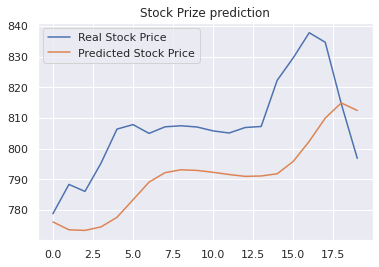

In [21]:
import seaborn as sns
sns.set()
plt.plot(real_stock_price, label="Real Stock Price")
plt.plot(predicted_stock_price, label="Predicted Stock Price")
plt.title("Stock Prize prediction")
plt.legend()

<font size="5">So we can see the the predicted Stock Price is more or less similar to actual Stock Price over a Month</font>

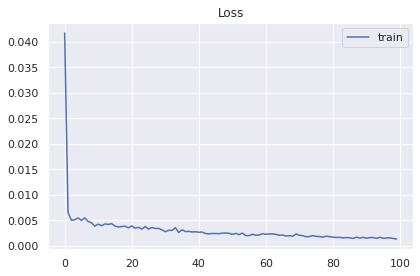

In [22]:
sns.lineplot(history.epoch, history.history['loss'], label='train')
plt.title('Loss')
plt.tight_layout()